##### Copyright 2019 The TensorFlow Authors.

# Convolutional Neural Network (CNN)

### Import TensorFlow

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### Download and prepare the CIFAR10 dataset


The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 13s 0us/step


### Visualize the data


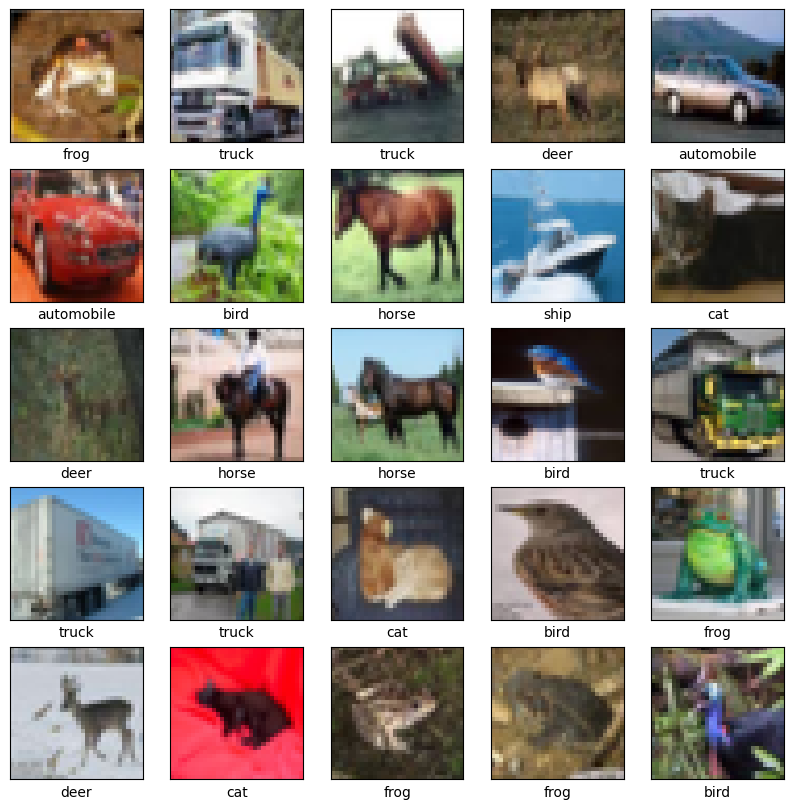

(50000, 32, 32, 3)


In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()
print(train_images.shape)

In [5]:
#CNN
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))) #input
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax')) # output


In [6]:
#MLP
model2 = models.Sequential()
model2.add(layers.Dense(128, input_dim=32*32*3)) #input
model2.add(layers.Activation('relu'))
model2.add(layers.Dense(128))
model2.add(layers.Activation('relu'))
model2.add(layers.Dense(10)) #output
model2.add(layers.Activation('softmax'))

Let's display the architecture of our model so far.

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 2048)              0

In [8]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               393344    
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 activation_1 (Activation)   (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
 activation_2 (Activation)   (None, 10)                0         
                                                                 
Total params: 411,146
Trainable params: 411,146
Non-tr

### Compile and train the model

In [9]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 [==============================] - 19s 5ms/step - loss: 1.5050 - accuracy: 0.4524 - val_loss: 1.2356 - val_accuracy: 0.5533
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1238 - accuracy: 0.6044 - val_loss: 1.0548 - val_accuracy: 0.6292
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9552 - accuracy: 0.6644 - val_loss: 0.9833 - val_accuracy: 0.6576
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8585 - accuracy: 0.6999 - val_loss: 1.0253 - val_accuracy: 0.6573
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7788 - accuracy: 0.7252 - val_loss: 0.8843 - val_accuracy: 0.6924
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7137 - accuracy: 0.7494 - val_loss: 0.8688 - val_accuracy: 0.7052
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6598 - accuracy: 0.7667 - val_loss: 0.8690 - val_accuracy: 0.7074
Ep

In [10]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model2.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

train_mlp = train_images.reshape((50000,-1))
test_mlp = test_images.reshape((10000,-1))

history_mlp = model2.fit(train_mlp, train_labels, epochs=10, 
                    validation_data=(test_mlp, test_labels))

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8467 - accuracy: 0.3294 - val_loss: 1.7140 - val_accuracy: 0.3935
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6756 - accuracy: 0.4007 - val_loss: 1.6335 - val_accuracy: 0.4216
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6089 - accuracy: 0.4235 - val_loss: 1.6133 - val_accuracy: 0.4326
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5622 - accuracy: 0.4396 - val_loss: 1.6396 - val_accuracy: 0.4166
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5267 - accuracy: 0.4540 - val_loss: 1.5111 - val_accuracy: 0.4618
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5036 - accuracy: 0.4603 - val_loss: 1.5321 - val_accuracy: 0.4592
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4813 - accuracy: 0.4707 - val_loss: 1.5266 - val_accuracy:

### Evaluate the CNN model

313/313 - 1s - loss: 0.9702 - accuracy: 0.6939 - 924ms/epoch - 3ms/step


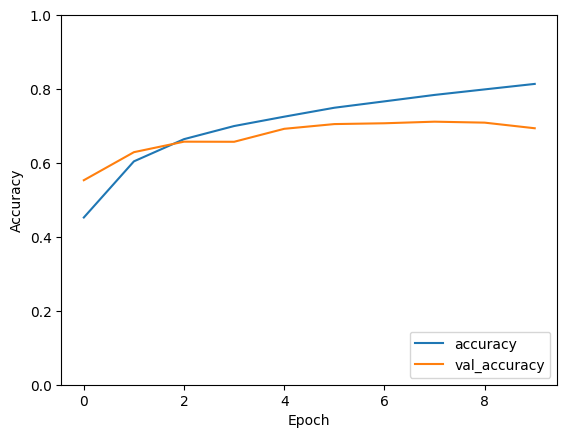

In [11]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

Text(0, 0.5, 'Loss')

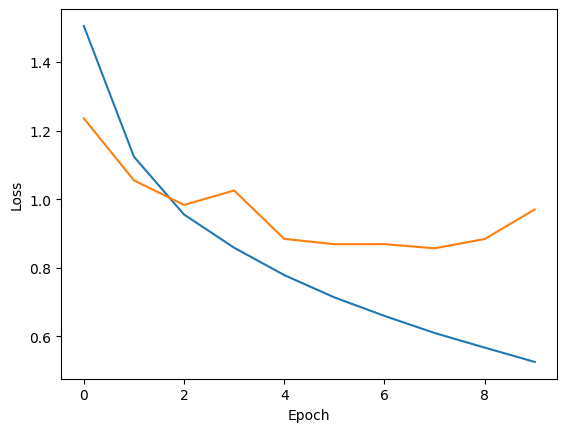

In [12]:
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')


In [13]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
train_loss, train_acc = model.evaluate(train_images,  train_labels, verbose=2)
print(test_acc)
print(train_acc)
#overfitting
#correct samples/all samples

313/313 - 1s - loss: 0.9702 - accuracy: 0.6939 - 662ms/epoch - 2ms/step
1563/1563 - 3s - loss: 0.5120 - accuracy: 0.8190 - 3s/epoch - 2ms/step
0.6938999891281128
0.8189600110054016


### Evaluate the MLP model

313/313 - 1s - loss: 0.9702 - accuracy: 0.6939 - 697ms/epoch - 2ms/step


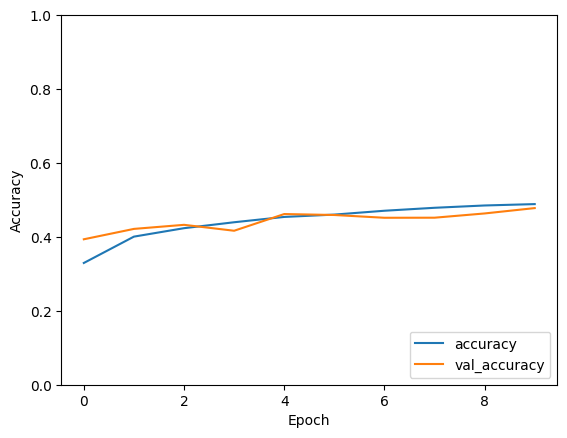

In [14]:
plt.plot(history_mlp.history['accuracy'], label='accuracy')
plt.plot(history_mlp.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

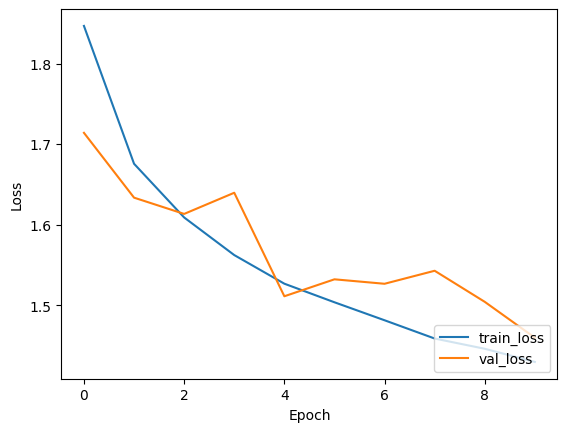

In [15]:
plt.plot(history_mlp.history['loss'], label = 'train_loss')
plt.plot(history_mlp.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

In [16]:
test_loss, test_acc = model2.evaluate(test_images.reshape(10000, -1),  test_labels, verbose=2)
train_loss, train_acc = model2.evaluate(train_images.reshape(50000, -1),  train_labels, verbose=2)
print(test_acc)
print(train_acc)

313/313 - 1s - loss: 1.4596 - accuracy: 0.4779 - 701ms/epoch - 2ms/step
1563/1563 - 3s - loss: 1.3693 - accuracy: 0.5127 - 3s/epoch - 2ms/step
0.4778999984264374
0.5127400159835815
